#### Let's begin by loading the packages we are working with.

In [1]:
install.packages("mlbench", repos = "http://cran.us.r-project.org")
install.packages("DataExplorer", repos = "http://cran.us.r-project.org")
install.packages("corrplot", repos = "http://cran.us.r-project.org")
install.packages("e1071", repos = "http://cran.us.r-project.org")
install.packages("usdm", repos = "http://cran.us.r-project.org")
library(tidyverse)
library(ggplot2)
library(pryr)
library(moments)
library(mlbench)
library(DataExplorer)
library(corrplot)
library(e1071)
library(usdm)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats

Attaching package: ‘pryr’

The following objects are masked from ‘package:purrr’:

    compose, partial

corrplot 0.84 loaded

Attaching package: ‘e1071’

The following objects are masked from ‘package:moments’:

    kurtosis, moment, skewness

Loading required package: sp
Loading required package: raster

Attaching package: ‘r

#### Then we load the data.

In [2]:
BostonURL <- "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"
Boston <- read.csv(url(BostonURL), sep = "", header = FALSE)

#### Let's give the columns names, structure the data, and check to see its size and if there are any missing or duplicate data.

In [3]:
colnames(Boston) <- c('Crime', 'LrgLots', 'IndAcr', 'River', 'NOX', 'Rms', 'OwnOcc', 'DistWork', 'HiwayAcc', 'PropTax', 'EdRat', 'Min', 'LowStatus', 'MedVal')
as_tibble(Boston)
object_size(Boston)
sum(is.na(Boston))
anyDuplicated(Boston)

Crime,LrgLots,IndAcr,River,NOX,Rms,OwnOcc,DistWork,HiwayAcc,PropTax,EdRat,Min,LowStatus,MedVal
0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


54.7 kB

[1] 0

[1] 0

#### Next we will run a statistical summary of the data and examine its structure.

In [4]:
summary(Boston)
str(Boston)

     Crime             LrgLots           IndAcr          River        
 Min.   : 0.00632   Min.   :  0.00   Min.   : 0.46   Min.   :0.00000  
 1st Qu.: 0.08204   1st Qu.:  0.00   1st Qu.: 5.19   1st Qu.:0.00000  
 Median : 0.25651   Median :  0.00   Median : 9.69   Median :0.00000  
 Mean   : 3.61352   Mean   : 11.36   Mean   :11.14   Mean   :0.06917  
 3rd Qu.: 3.67708   3rd Qu.: 12.50   3rd Qu.:18.10   3rd Qu.:0.00000  
 Max.   :88.97620   Max.   :100.00   Max.   :27.74   Max.   :1.00000  
      NOX              Rms            OwnOcc          DistWork     
 Min.   :0.3850   Min.   :3.561   Min.   :  2.90   Min.   : 1.130  
 1st Qu.:0.4490   1st Qu.:5.886   1st Qu.: 45.02   1st Qu.: 2.100  
 Median :0.5380   Median :6.208   Median : 77.50   Median : 3.207  
 Mean   :0.5547   Mean   :6.285   Mean   : 68.57   Mean   : 3.795  
 3rd Qu.:0.6240   3rd Qu.:6.623   3rd Qu.: 94.08   3rd Qu.: 5.188  
 Max.   :0.8710   Max.   :8.780   Max.   :100.00   Max.   :12.127  
    HiwayAcc         PropTa

'data.frame':	506 obs. of  14 variables:
 $ Crime    : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ LrgLots  : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ IndAcr   : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ River    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ NOX      : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ Rms      : num  6.58 6.42 7.18 7 7.15 ...
 $ OwnOcc   : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ DistWork : num  4.09 4.97 4.97 6.06 6.06 ...
 $ HiwayAcc : int  1 2 2 3 3 3 5 5 5 5 ...
 $ PropTax  : num  296 242 242 222 222 222 311 311 311 311 ...
 $ EdRat    : num  15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ Min      : num  397 397 393 395 397 ...
 $ LowStatus: num  4.98 9.14 4.03 2.94 5.33 ...
 $ MedVal   : num  24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...


#### We see we have a couple features that are integers.  The rest are numeric.  The two integer features are really factors.  *River* is a binary and *HiwayAcc* is an index.  Other features appear to be factors, so we will take care of those in a bit.

#### Next we will create an object, *BostonNum*, to work with.  It contains only the numeric features.  We run a sanity check to make sure we didn't screw up.

In [5]:
BostonNum <- Boston
BostonNum <- subset(BostonNum, select = c('Crime', 'LrgLots', 'IndAcr', 'NOX', 'Rms', 'OwnOcc', 'DistWork', 'PropTax', 'EdRat', 'Min', 'LowStatus', 'MedVal'))
summary(BostonNum)
str(BostonNum)

     Crime             LrgLots           IndAcr           NOX        
 Min.   : 0.00632   Min.   :  0.00   Min.   : 0.46   Min.   :0.3850  
 1st Qu.: 0.08204   1st Qu.:  0.00   1st Qu.: 5.19   1st Qu.:0.4490  
 Median : 0.25651   Median :  0.00   Median : 9.69   Median :0.5380  
 Mean   : 3.61352   Mean   : 11.36   Mean   :11.14   Mean   :0.5547  
 3rd Qu.: 3.67708   3rd Qu.: 12.50   3rd Qu.:18.10   3rd Qu.:0.6240  
 Max.   :88.97620   Max.   :100.00   Max.   :27.74   Max.   :0.8710  
      Rms            OwnOcc          DistWork         PropTax     
 Min.   :3.561   Min.   :  2.90   Min.   : 1.130   Min.   :187.0  
 1st Qu.:5.886   1st Qu.: 45.02   1st Qu.: 2.100   1st Qu.:279.0  
 Median :6.208   Median : 77.50   Median : 3.207   Median :330.0  
 Mean   :6.285   Mean   : 68.57   Mean   : 3.795   Mean   :408.2  
 3rd Qu.:6.623   3rd Qu.: 94.08   3rd Qu.: 5.188   3rd Qu.:666.0  
 Max.   :8.780   Max.   :100.00   Max.   :12.127   Max.   :711.0  
     EdRat            Min           LowSt

'data.frame':	506 obs. of  12 variables:
 $ Crime    : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ LrgLots  : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ IndAcr   : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ NOX      : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ Rms      : num  6.58 6.42 7.18 7 7.15 ...
 $ OwnOcc   : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ DistWork : num  4.09 4.97 4.97 6.06 6.06 ...
 $ PropTax  : num  296 242 242 222 222 222 311 311 311 311 ...
 $ EdRat    : num  15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ Min      : num  397 397 393 395 397 ...
 $ LowStatus: num  4.98 9.14 4.03 2.94 5.33 ...
 $ MedVal   : num  24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...


#### Things look good, so now we can visualize the data features to see what we are working with.  First we run a histogram of the entire data set, including all features.

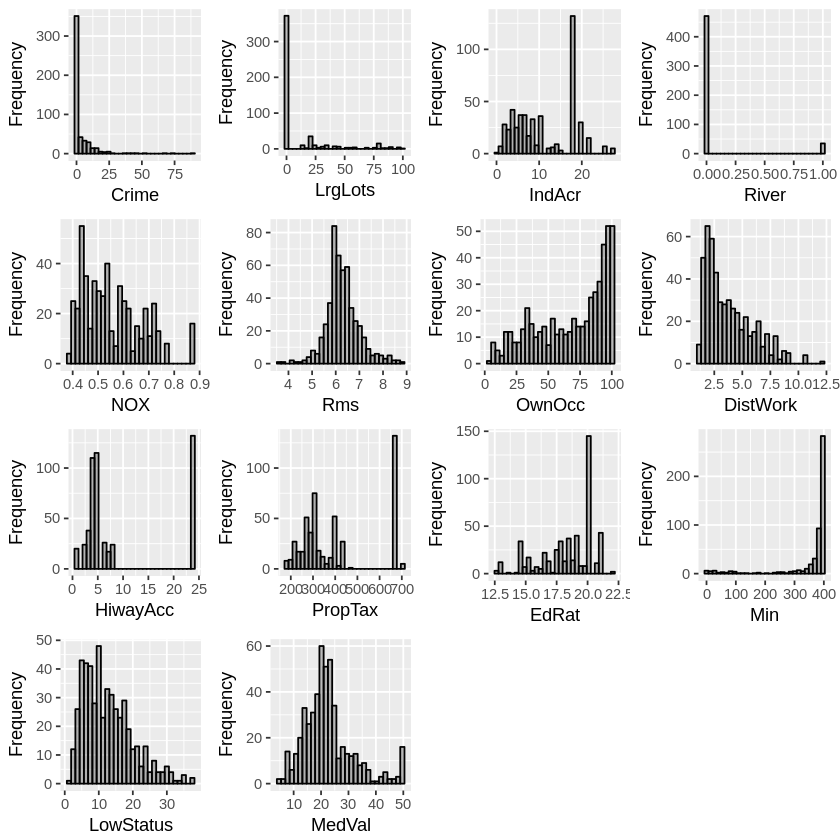

In [6]:
plot_histogram(Boston)

#### It would be helpful to develop some density plots.  None of our data look normally distributed, do they?

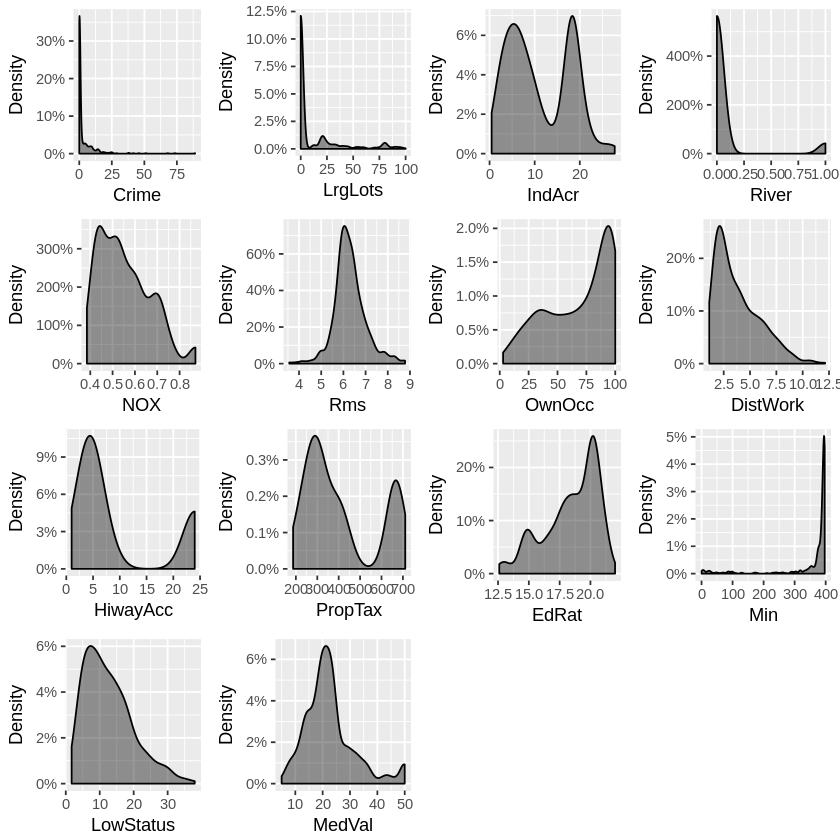

In [7]:
plot_density(Boston)

#### Let's break out the other features we think are factors and look at them separately using barplots.  Again, things looked very skewed.

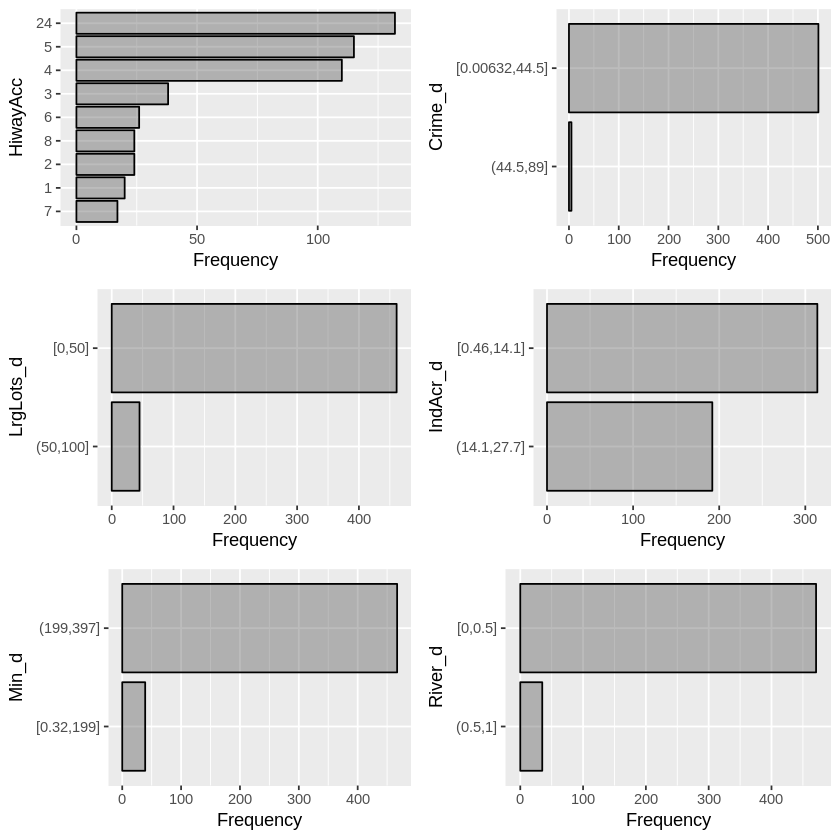

In [8]:
Boston$HiwayAcc <- as.factor(Boston$HiwayAcc)
for (col in c('Crime', 'LrgLots', 'IndAcr', 'Min', 'River'))
        Boston[[paste0(col, "_d")]] <- as.factor(ggplot2::cut_interval(Boston[[col]], 2))
plot_bar(Boston)

#### Let's see if we can get a better idea of the nature of the skew and identify any outliers.  We can use boxplots for this.  They are built on Tukey's principles so outliers here meet Tukey's definition of anything beyond *1.5 x IQR*.

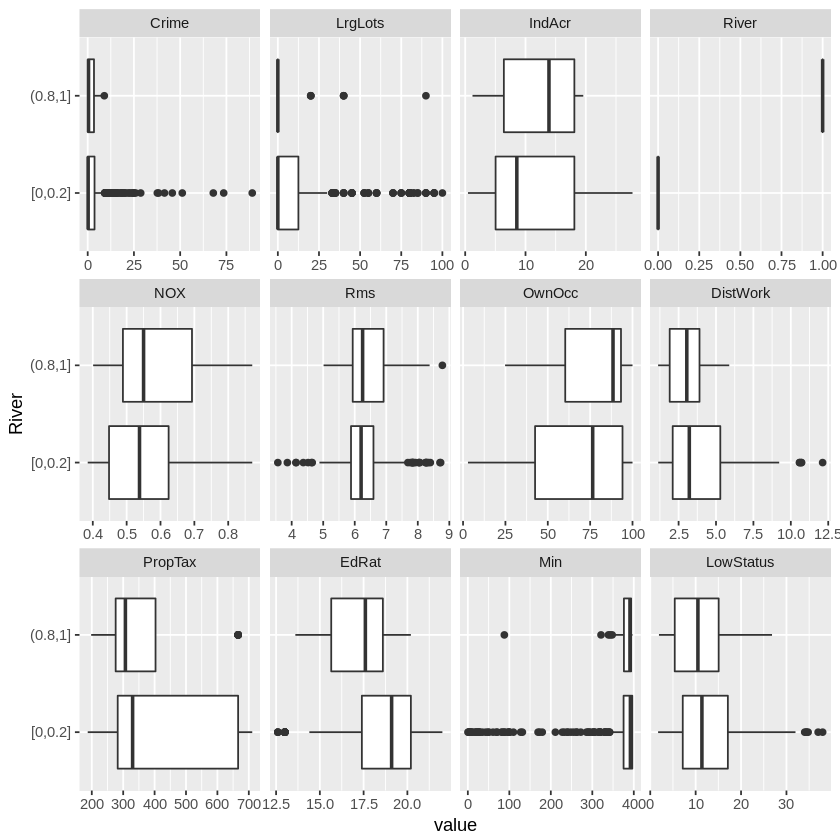

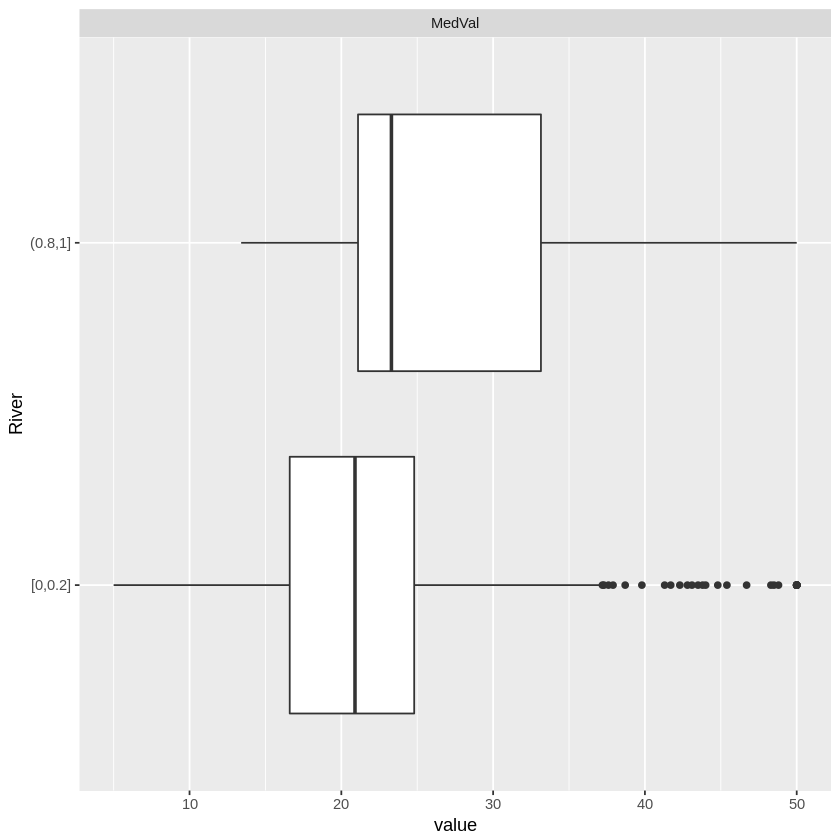

In [9]:
plot_boxplot(Boston, by = 'River')

#### Let's also look at the features we identify as numeric in order to see if there are any linear relationships of interest.  We can also get a sense of correlations by looking at their scatterplots.  We find some linear relationships appear to exist, and some strong correlation might be there, but overall the groupings appear pretty loose.  The plots in the bottom half are not of much interest to us.

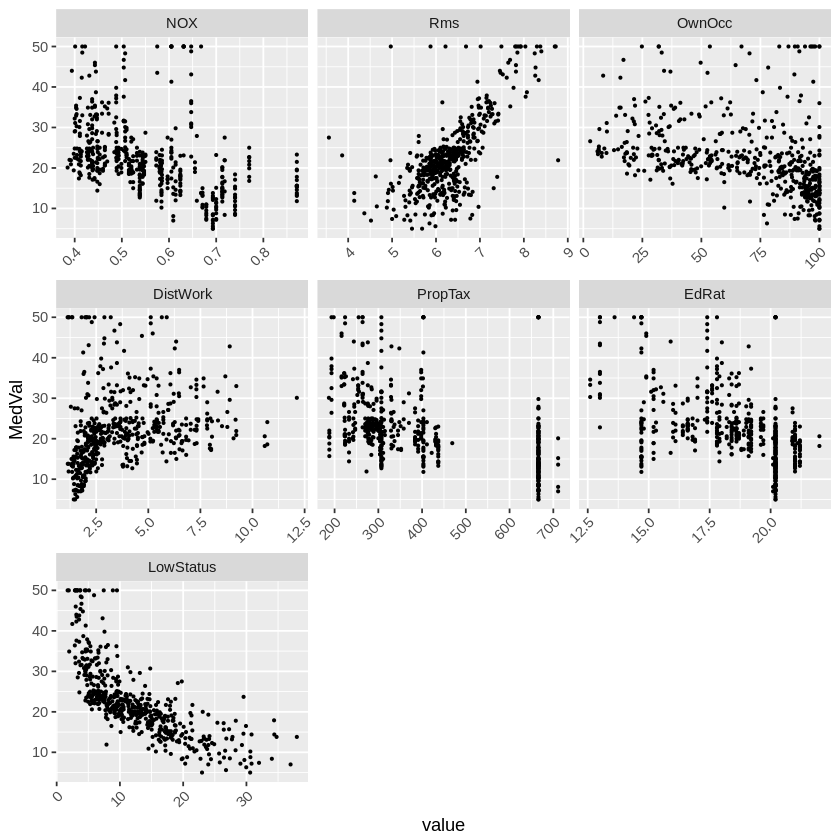

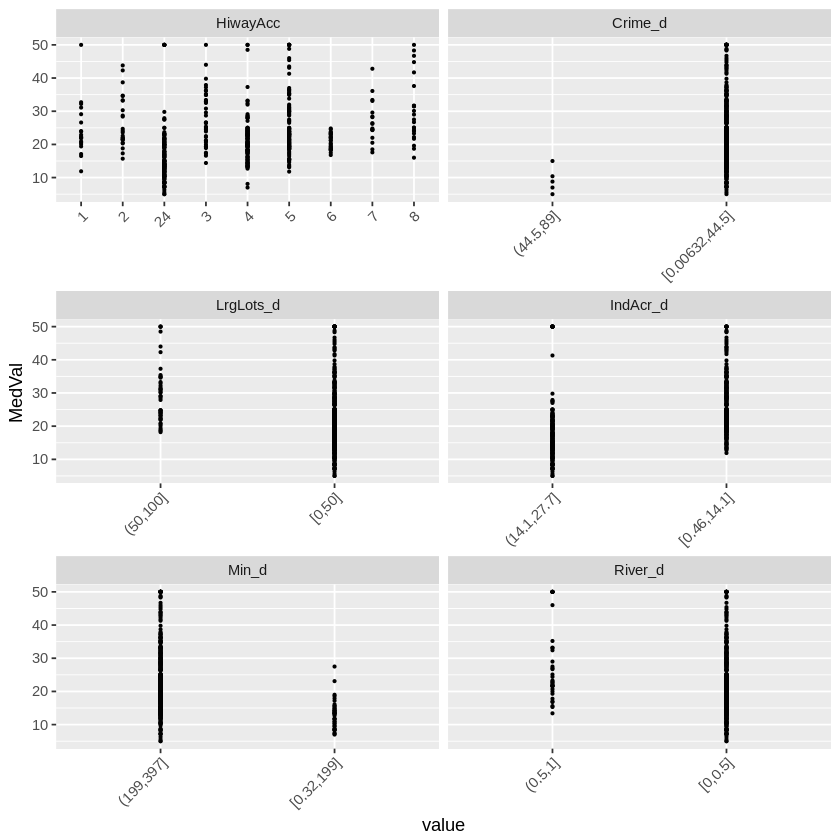

In [10]:
plot_scatterplot(subset(Boston, select = -c(Crime, LrgLots, IndAcr, Min, River)), by = 'MedVal', size = 0.5)

#### Our intuition tells us there is little or no normalcy in the distribution of the data, but we can run quantile plots to see this more clearly.  The red line is the theoretical path the data would take were they distributed normally. 

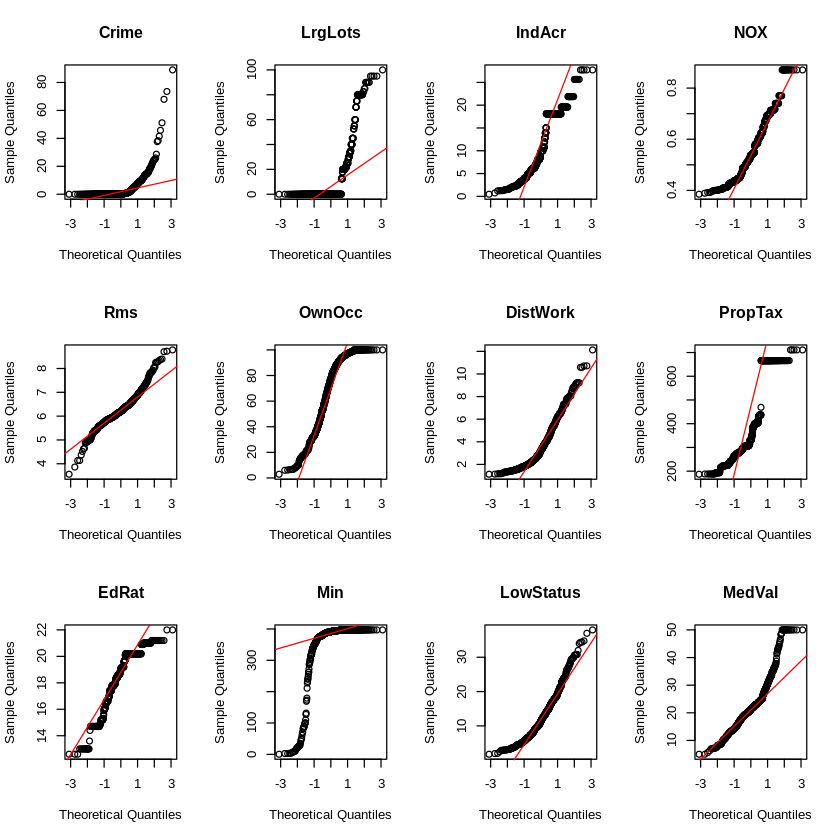

In [11]:
par(mfrow = c(3, 4))
qqnorm(Boston[[1]], main = 'Crime')
qqline(Boston[[1]], col = 'red')
qqnorm(Boston[[2]], main = 'LrgLots')
qqline(Boston[[2]], col = 'red')
qqnorm(Boston[[3]], main = 'IndAcr')
qqline(Boston[[3]], col = 'red')
qqnorm(Boston[[5]], main = 'NOX')
qqline(Boston[[5]], col = 'red')
qqnorm(Boston[[6]], main = 'Rms')
qqline(Boston[[6]], col = 'red')
qqnorm(Boston[[7]], main = 'OwnOcc')
qqline(Boston[[7]], col = 'red')
qqnorm(Boston[[8]], main = 'DistWork')
qqline(Boston[[8]], col = 'red')
qqnorm(Boston[[10]], main = 'PropTax')
qqline(Boston[[10]], col = 'red')
qqnorm(Boston[[11]], main = 'EdRat')
qqline(Boston[[11]], col = 'red')
qqnorm(Boston[[12]], main = 'Min')
qqline(Boston[[12]], col = 'red')
qqnorm(Boston[[13]], main = 'LowStatus')
qqline(Boston[[13]], col = 'red')
qqnorm(Boston[[14]], main = 'MedVal')
qqline(Boston[[14]], col = 'red')

#### We can see that the features do not follow the red line too closely so we cannot say any of the data are distriubted normally.